In [101]:
import os
from PIL import Image
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib as plt
import face_recognition as fr
import cv2


In [102]:
# Defina o caminho para a pasta contendo as imagens
image_folder = r'D:\FIAP\2024\1_Semestre\AI ENGENEERING, COGNITIVE AND SEMANTIC COMPUTATION & IOT\CP\KenAI\Reconhecimento_pessoa\images\Larissa'

# Obtenha uma lista de todos os arquivos na pasta
image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]


In [103]:
# Função para carregar e preprocessar as imagens
def load_and_preprocess_images(image_folder, image_files, target_size=(32, 32)):
    images = []
    for image_file in image_files:
        image_path = os.path.join(image_folder, image_file)
        image = Image.open(image_path).convert('RGB')  # Abre a imagem e converte para RGB
        image = image.resize(target_size)  # Redimensiona a imagem para o tamanho desejado
        image = np.array(image)  # Converte a imagem para um array NumPy
        images.append(image)
    images = np.array(images).astype('float32') / 255.0  # Normaliza os valores dos pixels para [0, 1]
    return images

In [104]:
x_train = load_and_preprocess_images(image_folder, image_files)
labels = list(range(len(x_train)))
num_classes = len(set(labels))
y_train = to_categorical(labels, num_classes=num_classes) 

# y_train = to_categorical(labels, num_classes=359)  
# y_train = to_categorical(labels, num_classes=233)  

# unique_labels = set(labels)
# classes = len(unique_labels)
# print("Número de classes:", classes)

In [105]:
modelo = Sequential()

modelo.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))  # Adjusted input shape
modelo.add(BatchNormalization())
modelo.add(MaxPooling2D(pool_size=(2, 2)))

modelo.add(Conv2D(64, (3, 3), activation='relu'))
modelo.add(BatchNormalization())
modelo.add(MaxPooling2D(pool_size=(2, 2)))

modelo.add(Conv2D(128, (3, 3), activation='relu'))
modelo.add(BatchNormalization())
modelo.add(MaxPooling2D(pool_size=(2, 2)))

modelo.add(Flatten())
modelo.add(Dense(512, activation='relu'))  # Keep the Dense layer with 512 units if it fits your model's complexity
modelo.add(Dropout(0.5))
modelo.add(Dense(num_classes, activation='softmax'))

modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

modelo.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 233)            │       119,529 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 476,329 (1.82 MB)

 Trainable params: 475,881 (1.82 MB)

 Non-trainable params: 448 (1.75 KB)

In [106]:
# early_stopping = EarlyStopping(monitor='val_loss',
#                                patience=10,
#                                verbose=1,
#                                restore_best_weights=True)

# reduce_lr = ReduceLROnPlateau(monitor='val_loss',
#                               factor=0.2,
#                               patience=5,
#                               min_lr=0.001,
#                               verbose=1)

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# history = modelo.fit(datagen.flow(x_train, y_train, batch_size=32),
#                      epochs=30,
#                      validation_data=(x_train, y_train),
#                      callbacks=[early_stopping, reduce_lr])

history = modelo.fit(datagen.flow(x_train, y_train, batch_size=32),
                     epochs=10,
                     validation_data=(x_train, y_train))

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.0000e+00 - loss: 6.6946 - val_accuracy: 0.0000e+00 - val_loss: 5.4444
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0066 - loss: 5.9132 - val_accuracy: 0.0043 - val_loss: 5.4355
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0159 - loss: 5.5701 - val_accuracy: 0.0086 - val_loss: 5.4180
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0311 - loss: 5.1483 - val_accuracy: 0.0043 - val_loss: 5.3982
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0411 - loss: 5.0346 - val_accuracy: 0.0043 - val_loss: 5.3875
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0156 - loss: 4.7537 - val_accuracy: 0.0043 - val_loss: 5.4303
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.0585 - loss: 4.7705 - val_accuracy: 0.0043 - val_loss: 5.5350
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.0853 - loss: 4.6906 - val_accuracy: 0.0043 - val_loss:

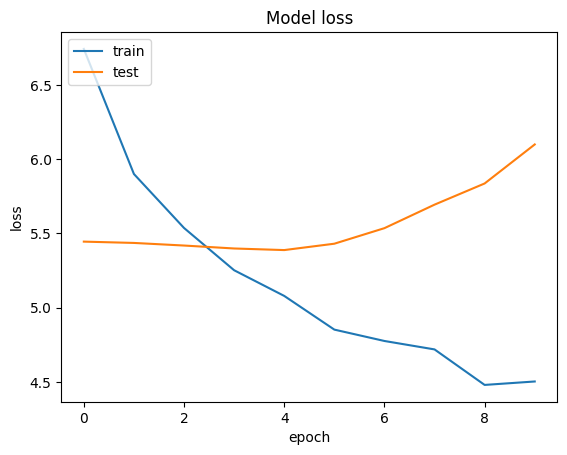

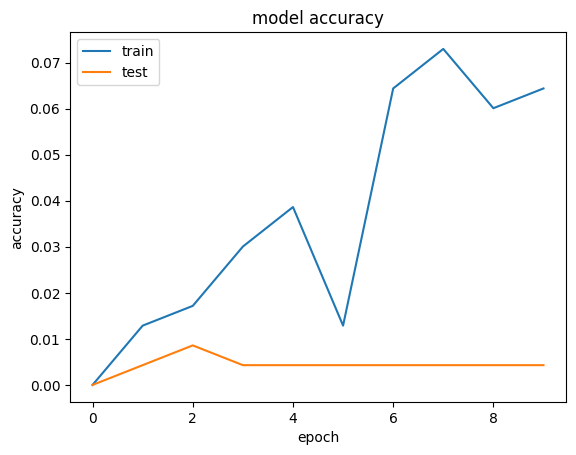

In [107]:
from matplotlib import pyplot as plt

## exibe history com plot de loss e
#acuracia
def plot_history(history):
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

plot_history(history)


In [108]:
modelo.save(r'D:\FIAP\2024\1_Semestre\AI ENGENEERING, COGNITIVE AND SEMANTIC COMPUTATION & IOT\CP\KenAI\Reconhecimento_pessoa\modelo.h5')



: 